# graphviz 설치
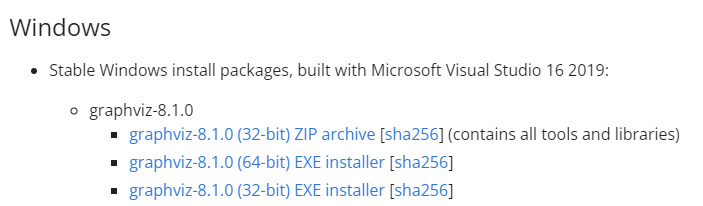
1. https://graphviz.org/download/
2. graphviz-8.1.0 (64-bit) EXE installer [sha256] 선택
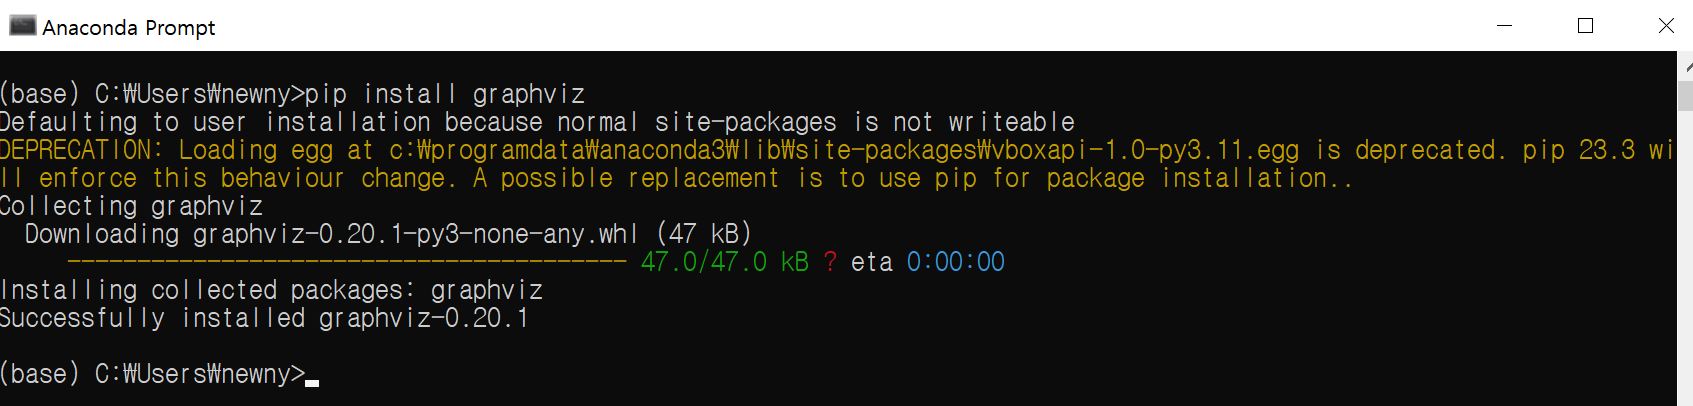
3. pip install graphviz

In [1]:
# 사전작업
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

pd.options.display.max_columns = None

data = pd.read_csv('./data/mushroom.csv')
X = data.loc[:, 'cap-shape':]
y = data.loc[:, 'poisonous']

print(y.describe())
X.iloc[:,1].value_counts()

X_one_hot = pd.get_dummies(X)
X= X_one_hot

X_train, X_test = train_test_split(X, test_size=0.3, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
pre = tree_model.predict(X_test)

print("accuracy_score 사용 :", accuracy_score(y_test, pre))
print("모델.score 사용 :",tree_model.score(X,y))

cv_result = cross_val_score(tree_model, X_train, y_train, cv=5)
print(cv_result, cv_result.mean())

fi = tree_model.feature_importances_

fi_df = pd.DataFrame(fi, index=X_train.columns, columns=['feature_importances'])
fi_df.sort_values(by='feature_importances',ascending=False)

count     8124
unique       2
top          e
freq      4208
Name: poisonous, dtype: object
(5686, 117) (2438, 117) (5686,) (2438,)
accuracy_score 사용 : 1.0
모델.score 사용 : 1.0
[1.         1.         1.         0.99912049 1.        ] 0.9998240985048372


,feature_importances
odor_n,0.608902
stalk-root_c,0.181454
stalk-surface-below-ring_y,0.098180
spore-print-color_r,0.036178
odor_l,0.025074
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_b,0.000000


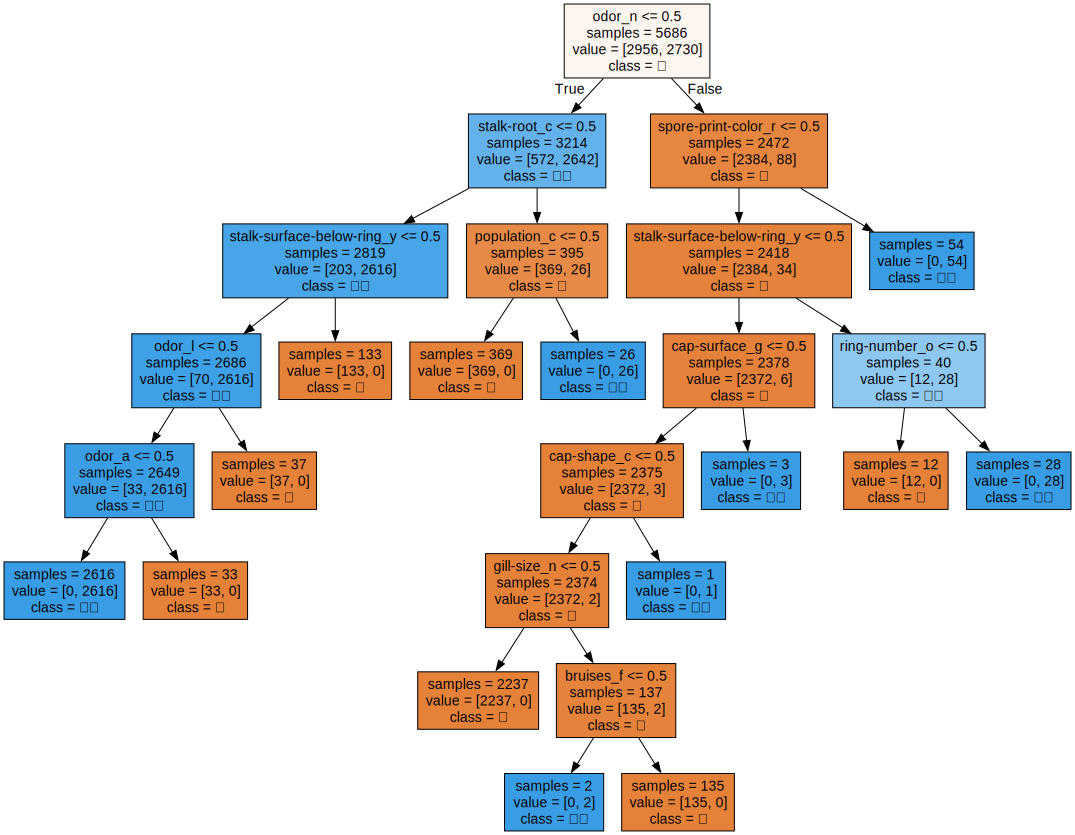

In [2]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot',
               class_names=['독','식용'],
               feature_names=X_one_hot.columns,
               impurity=False,
               filled=True)

# tree.dot 불러오면서 시각화(그래프화)
import graphviz
with open(r'C:\Users\newny\Desktop\PythonScienceStudy\MachineLearning\tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 과대 적합 제어 후 시각화 확인
 - tree 하이퍼 파라미터
    - max_depth : 최대 깊이
    - max_leaf_nodes : 최대 리프노드 갯수
    - min_samples_split : 노드를 분할하기 위한 최소 샘플수
    - min_samples_leaf : 분리되고 난 후의 노드의 시점
    - 종합적으로, 트리 모델의 깊이를 제어하는 파라미터

[0.98242531 0.98680739 0.98504837 0.97977133 0.98592788] 0.9839960553548712


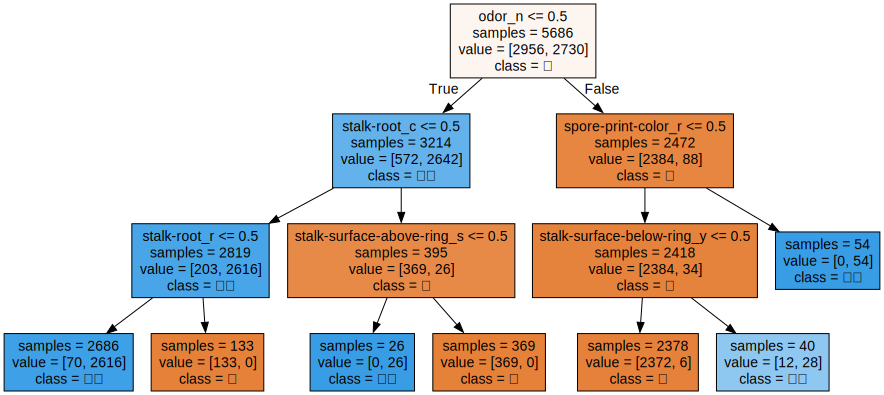

In [3]:
# 모델의 깊으를 설정하는 매개변수 연결 : max_depth
tree_model2 = DecisionTreeClassifier(max_depth=3)
tree_model2.fit(X_train, y_train)

cv_result = cross_val_score(tree_model2, X_train, y_train, cv=5)
print(cv_result, cv_result.mean())

fi = tree_model2.feature_importances_

fi_df = pd.DataFrame(fi, index=X_train.columns, columns=['feature_importances'])
fi_df.sort_values(by='feature_importances',ascending=False)

from sklearn.tree import export_graphviz
export_graphviz(tree_model2, out_file='tree2.dot',
               class_names=['독','식용'],
               feature_names=X_one_hot.columns,
               impurity=False,
               filled=True)

# tree.dot 불러오면서 시각화(그래프화)
import graphviz
with open(r'C:\Users\newny\Desktop\PythonScienceStudy\MachineLearning\tree2.dot', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))